In [378]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno

<Axes: >

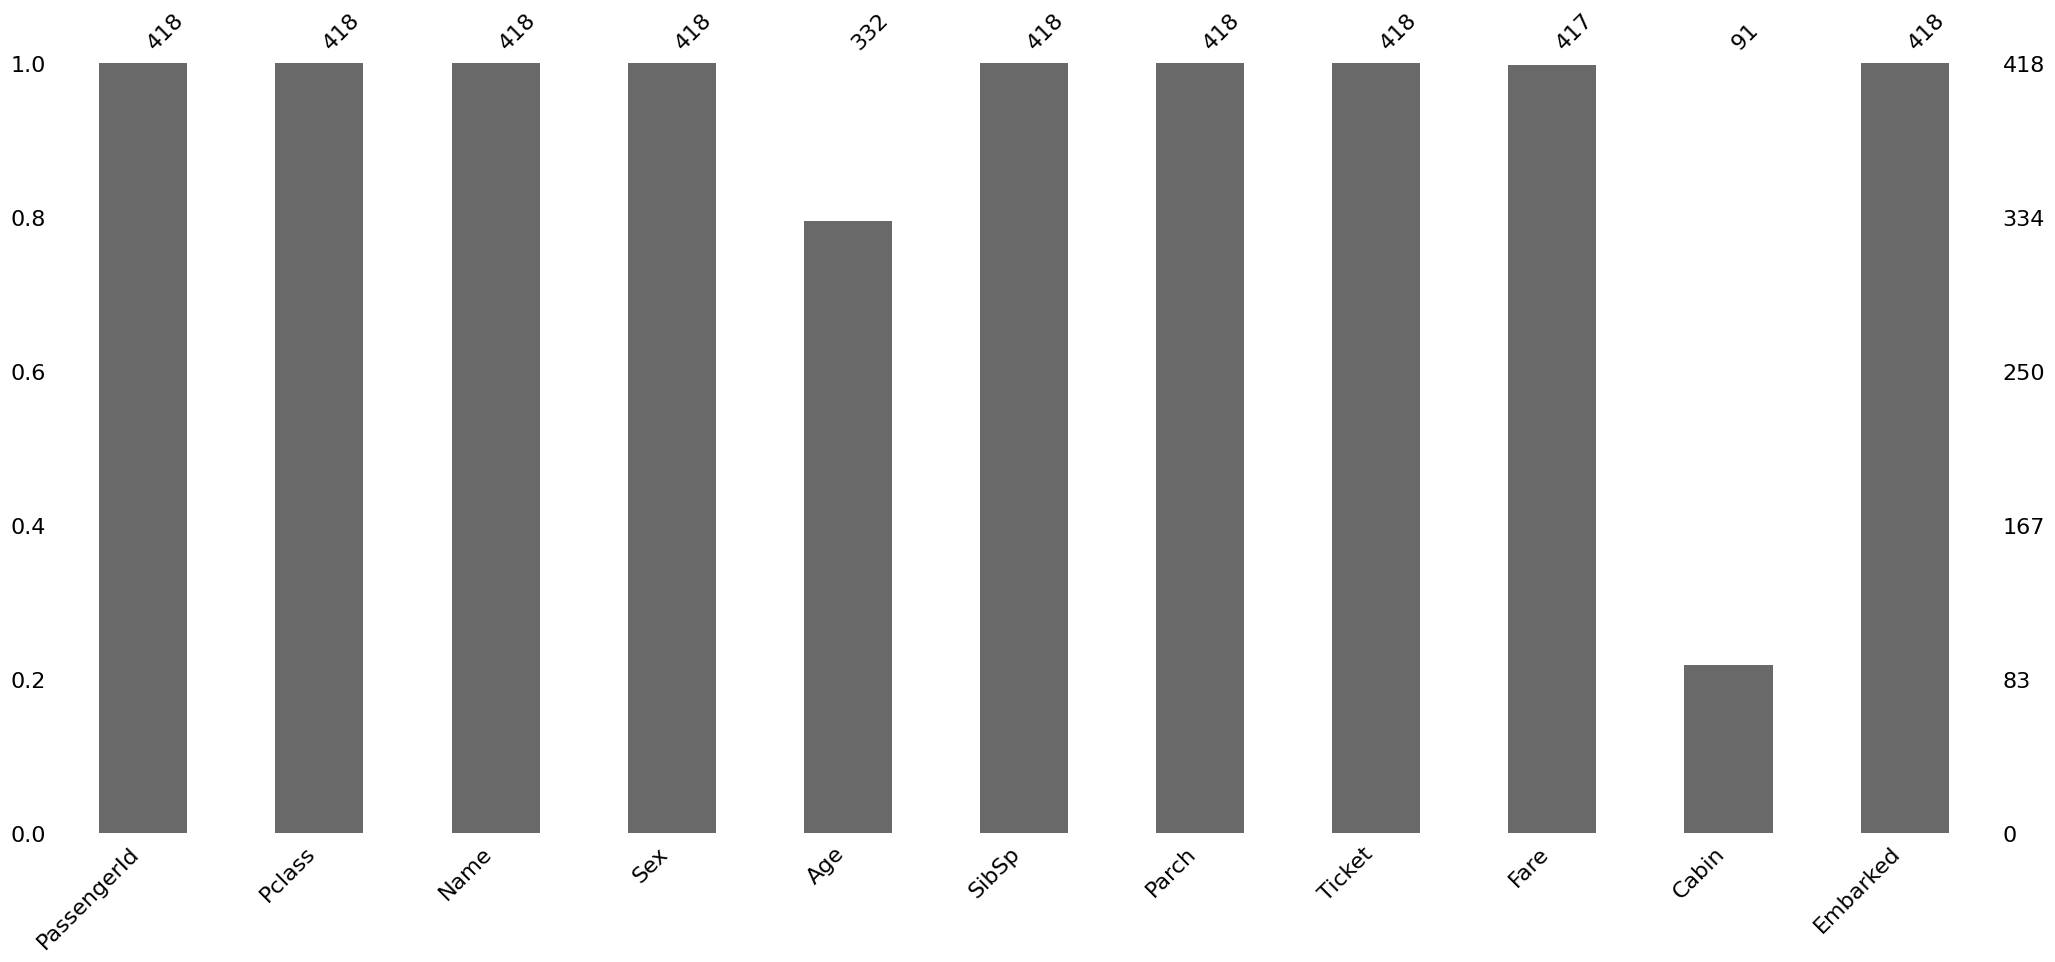

In [379]:
#steps 1 missing values
df=pd.read_csv("test.csv") #train
msno.bar(df)

In [380]:
#aff1 = sb.countplot(x='Cabin', data=df)
#df['Cabin'].value_counts() 
df['Cabin'].fillna(value=0,inplace=True)


C:\Users\kaout\AppData\Local\Temp\ipykernel_16584\3336055406.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna(value=0,inplace=True)


In [381]:
df.loc[(df.Cabin !=0),'Cabin']=1

df.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

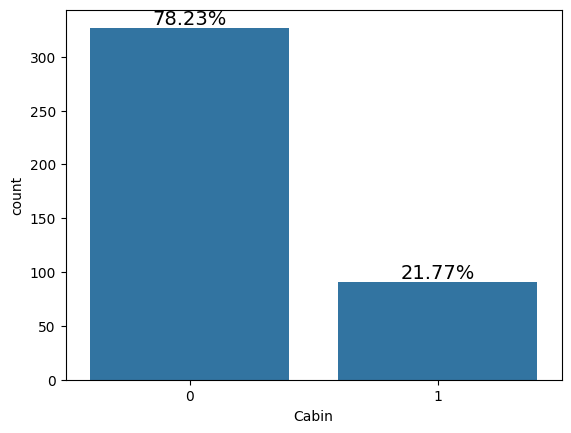

In [382]:
s= sb.countplot(x='Cabin', data = df)
size=[]
for p in s.patches:
    h = p.get_height()
    size.append(h)
    s.text(p.get_x()+p.get_width()/2.,h+3,'{:1.2f}%'.format(h/len(df)*100),ha="center",fontsize=14)

In [383]:

df["Age"] = df["Age"].interpolate(method='linear',Limit_direction='forward' ,axis=0)
print(df['Age'][:20])

0     34.5
1     47.0
2     62.0
3     27.0
4     22.0
5     14.0
6     30.0
7     26.0
8     18.0
9     21.0
10    33.5
11    46.0
12    23.0
13    63.0
14    47.0
15    24.0
16    35.0
17    21.0
18    27.0
19    45.0
Name: Age, dtype: float64


In [384]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

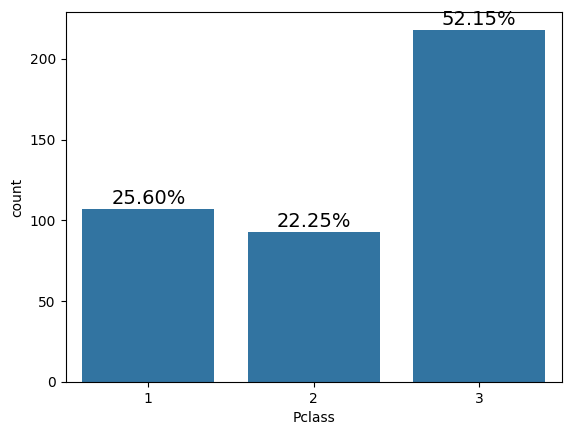

In [385]:
s= sb.countplot(x='Pclass', data = df)
size=[]
for p in s.patches:
    h = p.get_height()
    size.append(h)
    s.text(p.get_x()+p.get_width()/2.,h+3,'{:1.2f}%'.format(h/len(df)*100),ha="center",fontsize=14)

In [386]:
s = pd.get_dummies(df['Pclass'])

In [387]:
s = s.astype(int)

In [388]:
df.drop(['Pclass'],axis=1,inplace=True)
df= pd.concat([df,s],axis=1)
df

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3
0,892,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,0,0,1
2,894,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,0,1,0
3,895,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",male,33.5,0,0,A.5. 3236,8.0500,0,S,0,0,1
414,1306,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,1,C,1,0,0
415,1307,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S,0,0,1
416,1308,"Ware, Mr. Frederick",male,38.5,0,0,359309,8.0500,0,S,0,0,1


In [389]:
# Renommer les colonnes
new_column_names = {1: 'Pclass_1', 2: 'Pclass_2',3:'Pclass_3'}
df.rename(columns=new_column_names, inplace=True)

In [390]:
e = pd.get_dummies(df['Embarked'])
e = e.astype(int)

df.drop('Embarked', axis=1, inplace=True)

df = pd.concat([df, e], axis=1)

In [391]:
c = pd.get_dummies(df['Sex'])
c = c.astype(int)

df.drop('Sex', axis=1, inplace=True)

df = pd.concat([df, c], axis=1)

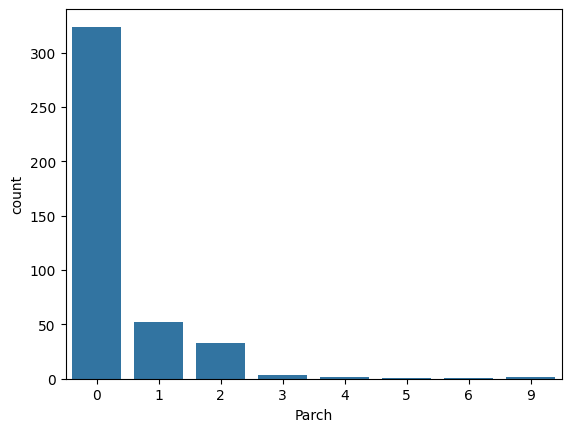

In [392]:
s= sb.countplot(x='Parch', data = df)

In [393]:
valeurs_negligeables = [3, 4, 5,6]
df['Parch'] = df['Parch'].apply(lambda x: 2 if x in valeurs_negligeables else x)


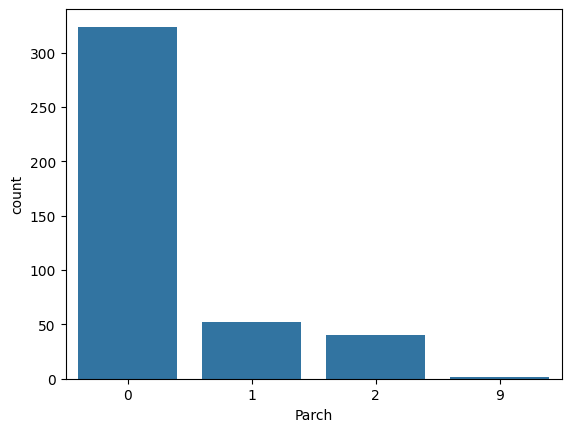

In [394]:
s= sb.countplot(x='Parch', data = df)

In [395]:
p = pd.get_dummies(df['Parch'])
p = p.astype(int)

df.drop('Parch', axis=1, inplace=True)

df = pd.concat([df, p], axis=1)

In [396]:

new_column_names = {0: 'Parch_1', 1: 'Parch_2',2:'Parch_3'}
df.rename(columns=new_column_names, inplace=True)

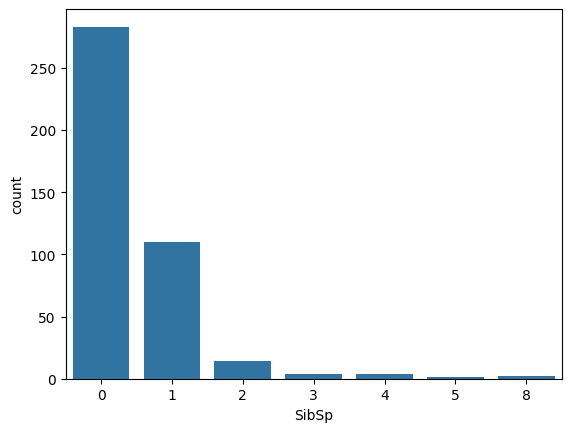

In [397]:
s= sb.countplot(x='SibSp', data = df)

In [398]:
valeurs_negligeables = [3, 4, 5,8]
df['SibSp'] = df['SibSp'].apply(lambda x: 2 if x in valeurs_negligeables else x)

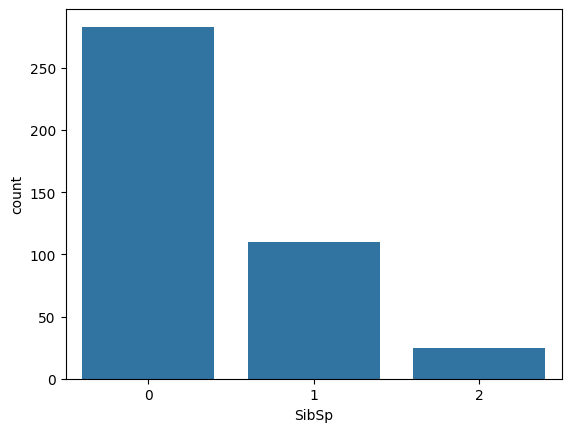

In [399]:
s= sb.countplot(x='SibSp', data = df)

In [400]:
p = pd.get_dummies(df['SibSp'])
p = p.astype(int)

df.drop('SibSp', axis=1, inplace=True)

df = pd.concat([df, p], axis=1)

new_column_names = {0: 'SibSp_1', 1: 'SibSp_2',2:'SibSp_3'}
df.rename(columns=new_column_names, inplace=True)

In [401]:
def names(dataset, name, t):
    for i in range(len(dataset['Name'])):
        if name in dataset['Name'][i]:
            dataset['Name'][i] = t

In [402]:
names(df, name='Miss.',t="Miss")
names(df, name='Mrs.',t="Mrs")
names(df, name='Mr.',t="Mr")
names(df, name='Dr.',t="Dr")
names(df, name='Master.',t="Master")
names(df, name='Rev.',t="Rev")
names(df, name='Mlle.',t="Mlle")
names(df, name='Mme.',t="Mme")
names(df, name='Ms.',t="Ms")
names(df, name='Major.',t="Major")
names(df, name='Sir.',t="Sir")
names(df, name='Col.',t="Col")
names(df, name='Capt.',t="Capt")
names(df, name='Jonkheer.',t="Jonkheer")
names(df, name='Countess.',t="Countess")
names(df, name='Lady.',t="Lady")
names(df, name='Don.',t="Don")

C:\Users\kaout\AppData\Local\Temp\ipykernel_16584\289184150.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset['Name'][i] = t
C:\Users\kaout\AppData\Local\Temp\ipykernel_16584\289184150.py:4: SettingWithCopyWarning: 
A value is tryi

In [403]:
categories_uniques = df['Name'].unique()
print("Catégories uniques :", categories_uniques)

Catégories uniques : ['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr'
 'Oliva y Ocana, Dona. Fermina']


In [404]:
names(df, name='Miss',t="Miss")
names(df, name='Mme',t="Miss")
names(df, name='Mrs',t="Miss")
names(df, name='Mr',t="Mr")
names(df, name='Dr',t="Mr")
names(df, name='Rev',t="Mr")
names(df, name='Mlle',t="Miss")
names(df, name='Mme',t="Miss")
names(df, name='Ms',t="Miss")
names(df, name='Major',t="Mr")
names(df, name='Sir',t="Mr")
names(df, name='Col',t="Mr")
names(df, name='Capt',t="Mr")
names(df, name='Jonkheer',t="Mr")
names(df, name='Countess',t="Mr")
names(df, name='Lady',t="Miss")
names(df, name='Don',t="Mr")
names(df, name='Master',t="Mr")

C:\Users\kaout\AppData\Local\Temp\ipykernel_16584\289184150.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset['Name'][i] = t
C:\Users\kaout\AppData\Local\Temp\ipykernel_16584\289184150.py:4: SettingWithCopyWarning: 
A value is tryi

In [405]:
categories_uniques = df['Name'].unique()
print("Catégories uniques :", categories_uniques)

Catégories uniques : ['Mr' 'Miss']


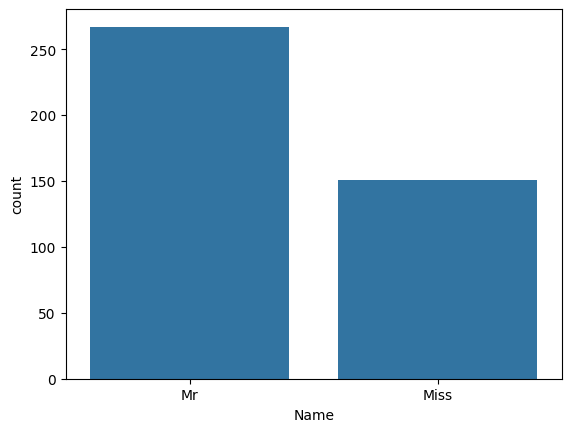

In [406]:
s= sb.countplot(x='Name', data = df)

In [407]:
n = pd.get_dummies(df['Name'])
n = n.astype(int)

df.drop('Name', axis=1, inplace=True)

df = pd.concat([df, n], axis=1)


In [408]:
df.drop('Ticket', axis=1, inplace=True)
df.drop('Fare', axis=1, inplace=True)


In [409]:
df

,PassengerId,Age,Cabin,Pclass_1,Pclass_2,Pclass_3,C,Q,S,female,male,Parch_1,Parch_2,Parch_3,9,SibSp_1,SibSp_2,SibSp_3,Miss,Mr
0,892,34.5,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1
1,893,47.0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0
2,894,62.0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1
3,895,27.0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1
4,896,22.0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,33.5,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1
414,1306,39.0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
415,1307,38.5,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1
416,1308,38.5,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1


In [410]:

age_pclass1_male = df[(df["Pclass_1"] == 1) & (df["male"] == 1)]["Age"]
age_pclass1_female = df[(df["Pclass_1"] == 1) & (df["male"] == 0)]["Age"]





In [411]:
df.to_csv("DataTestPret.csv")